<a href="https://colab.research.google.com/github/faisfprasetyo/cuaca_kelompok4/blob/main/prediksi_cuaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("seattleweather.csv")
data.head(100)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
95,2012-04-05,4.6,9.4,2.8,1.8,snow
96,2012-04-06,0.3,11.1,3.3,2.6,rain
97,2012-04-07,0.0,16.1,1.7,4.3,sun
98,2012-04-08,0.0,21.1,7.2,4.1,sun


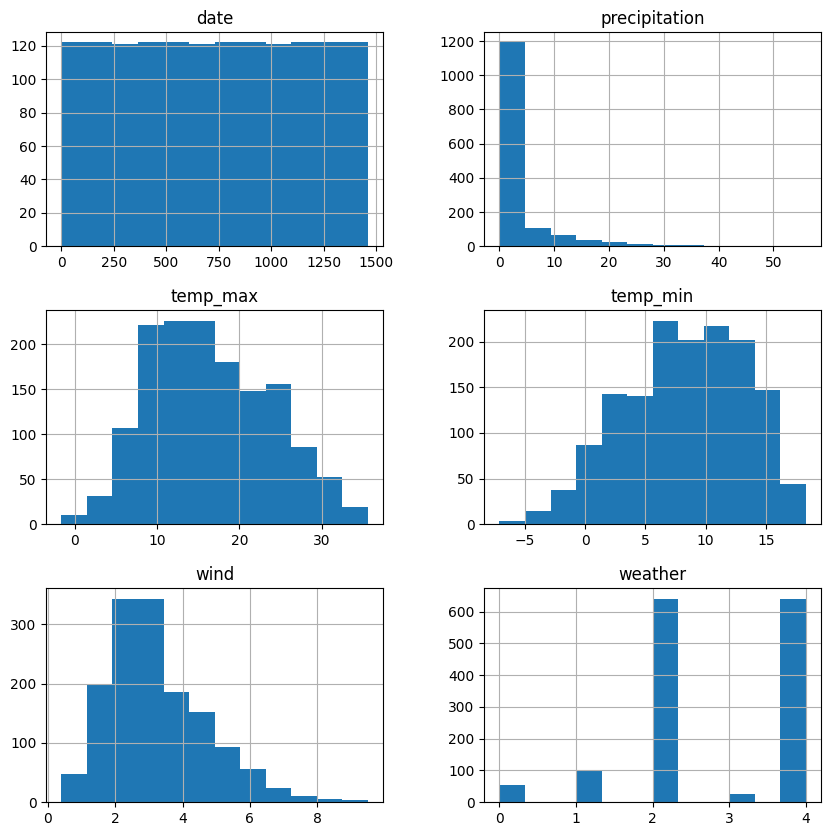

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=12, figsize=(10,10))
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
data['date'] = enc.fit_transform(data['date'].values)
data['weather'] = enc.fit_transform(data['weather'].values)

In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0.0,12.8,5.0,4.7,0
1,1,10.9,10.6,2.8,4.5,2
2,2,0.8,11.7,7.2,2.3,2
3,3,20.3,12.2,5.6,4.7,2
4,4,1.3,8.9,2.8,6.1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   int64  
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 68.6 KB


In [ ]:
atr_data = data.drop(columns=['weather', 'date'])
atr_data.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [ ]:
cls_data = data['weather']
cls_data.head()

0    0
1    2
2    2
3    2
4    2
Name: weather, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
xtrain, xtemp, ytrain, ytemp = train_test_split(atr_data, cls_data, test_size=0.5, random_state=42)
tree_data = DecisionTreeClassifier(max_depth=5)
tree_data.fit (xtrain, ytrain)

DecisionTreeClassifier(max_depth=5)

In [ ]:
xval, xtest, yval, ytest = train_test_split(xtemp, ytemp, test_size=0.2, random_state=42)
yval_pred = tree_data.predict(xval)
tree_data.predict(xval)

array([2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 1, 2, 2, 4,
       3, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4,
       4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4,
       4, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 2, 4, 4, 3, 2, 2, 4,
       2, 4, 4, 1, 2, 2, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4,
       4, 4, 4, 4, 2, 1, 4, 2, 2, 4, 2, 3, 2, 4, 4,

In [ ]:
# Menampilkan akurasi data validasi
accuracy_val = accuracy_score(yval, yval_pred)
print(f'Akurasi pada data validasi: {accuracy_val}')

Akurasi pada data validasi: 0.8321917808219178


In [ ]:
ytrain_pred = tree_data.predict(xtrain)
tree_data.predict(xtrain)

array([3, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 1, 2, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2,
       4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 0, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 0, 4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4,
       2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4,
       4, 0, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 3, 4, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 3, 1, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2,
       4, 4, 4, 2, 1, 2, 4, 2, 4, 1, 2, 4, 2, 4, 4,

In [ ]:
# Menampilkan akurasi data latih
accuracy_train = accuracy_score(ytrain, ytrain_pred)
print(f'Akurasi pada data latih: {accuracy_train}')

Akurasi pada data latih: 0.8767123287671232


In [ ]:
from sklearn.model_selection import cross_val_score

# Menampilkan cross validation
scores = cross_val_score(tree_data, xtrain, ytrain, cv=5)
print(scores)

[0.75342466 0.82876712 0.8630137  0.84246575 0.86986301]


In [ ]:
if accuracy_val > 0.8:
    # Menguji model dengan data uji (testing)
    ytest_pred = tree_data.predict(xtest)

    # Mengukur akurasi model pada data uji (testing)
    accuracy_test = accuracy_score(ytest, ytest_pred)
    print(f'Akurasi pada data uji: {accuracy_test}')

    # Menampilkan laporan klasifikasi
    print('\nLaporan Klasifikasi:\n', classification_report(ytest, ytest_pred, zero_division=1))
else:
    print('Model tidak mencapai akurasi yang memuaskan pada data validasi. Periksa dan optimalkan model Anda.')

Akurasi pada data uji: 0.8435374149659864

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       0.33      0.11      0.17         9
           2       0.95      0.91      0.93        67
           3       0.50      0.25      0.33         4
           4       0.78      0.98      0.87        62

    accuracy                           0.84       147
   macro avg       0.71      0.45      0.46       147
weighted avg       0.83      0.84      0.81       147



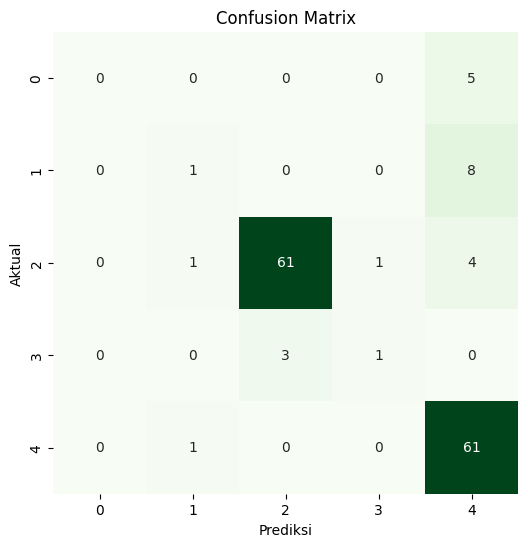

In [ ]:
from sklearn import metrics
import seaborn as sns

# Menampilkan matrix confusion
cm = metrics.confusion_matrix(ytest, ytest_pred)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d", cbar=False, ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree

# Mendapatkan label kelas yang sesuai dengan transformasi LabelEncoder
class_names = enc.inverse_transform(tree_data.classes_)

# Menggunakan model Decision Tree yang sudah di-fit
export_graphviz(tree_data, out_file='tree_cuaca.dot', class_names=class_names,
                feature_names=atr_data.columns, impurity=False, filled=True)

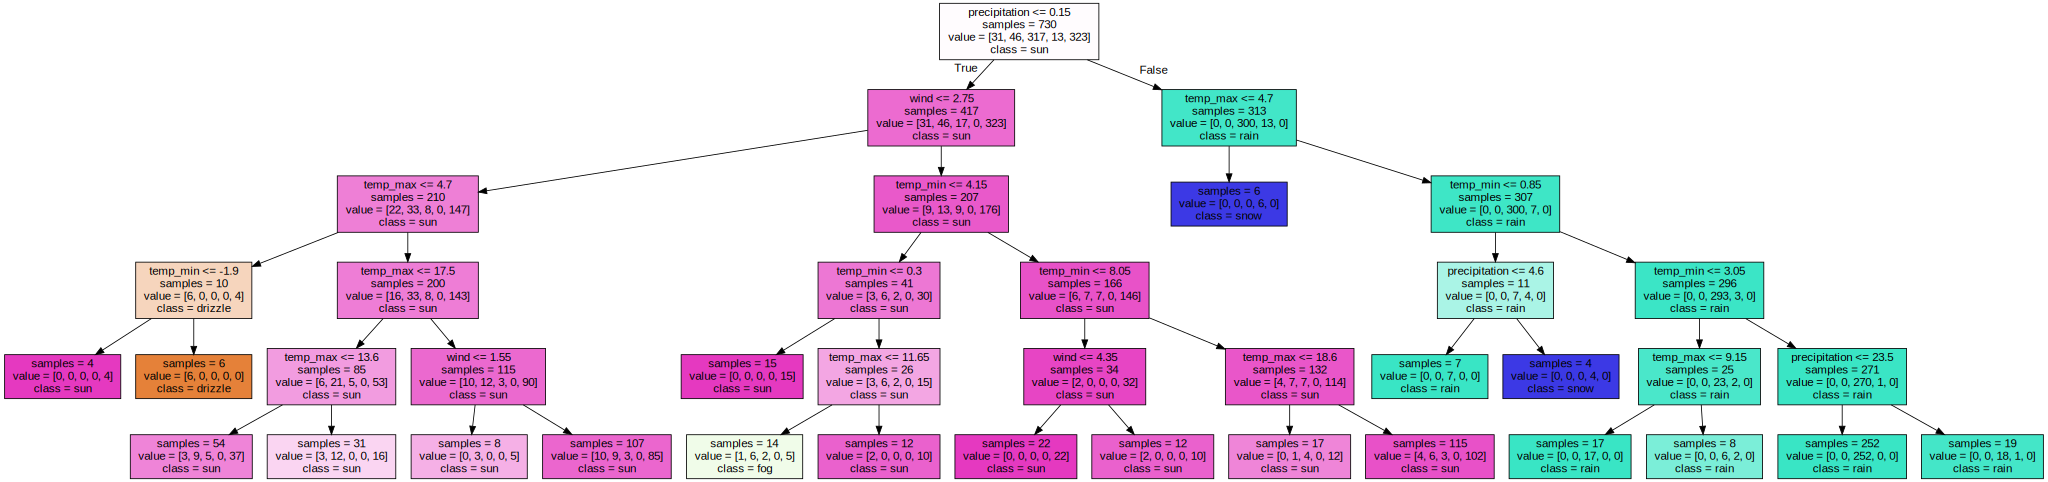

In [ ]:
import graphviz

# Menampilkan tree
with open('tree_cuaca.dot') as fig:
  figsize= (6,6)
  dot_graph = fig.read()
graphviz.Source(dot_graph)

In [ ]:
import numpy as np

# Masukan input dari pengguna
def get_user_input():
    precipitation = float(input("Masukkan jumlah presipitasi (%): "))
    temp_max = float(input("Masukkan suhu maksimum (°C): "))
    temp_min = float(input("Masukkan suhu minimum (°C): "))
    wind = float(input("Masukkan kecepatan angin (km/h): "))

    user_input = [precipitation, temp_max, temp_min, wind]
    return user_input

# Menampilkan input dari pengguna
print("\nMasukkan kondisi cuaca untuk diprediksi:")
new_data = [get_user_input()]  # No need for np.array

# Menggunakan model Decision Tree yang sudah di-fit untuk prediksi cuaca
prediction = tree_data.predict(new_data)

# Mendapatkan label cuaca yang sesuai dengan transformasi LabelEncoder
weather_labels = enc.inverse_transform(prediction)

# Menampilkan hasil prediksi
print("\n====================")
print(f"Hasil Prediksi Cuaca: {weather_labels[0]}")
print("====================")



Masukkan kondisi cuaca untuk diprediksi:
Masukkan jumlah presipitasi (%): 75
Masukkan suhu maksimum (°C): 30
Masukkan suhu minimum (°C): 27
Masukkan kecepatan angin (km/h): 10

Hasil Prediksi Cuaca: rain


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
